Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [2]:
## If you are using the data by mounting the google drive, use the following :

## Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

## Defining paths of Training and Test dataset
data_dir_train = pathlib.Path('gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train')
data_dir_test = pathlib.Path('gdrive/My Drive/MLAI/CNN/Melanoma_Data/Test')

In [4]:
## Number of images of both train and test
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
## Basic parameters definition
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

## Writing train dataset
train_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, 
    batch_size=batch_size, 
    image_size=(img_height,img_width),
    seed=123, 
    validation_split=0.2,
    subset='training'
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

## Writing validation dataset
val_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, 
    batch_size=batch_size, 
    image_size=(img_height,img_width),
    seed=123, 
    validation_split=0.2,
    subset='validation'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.

## Classes present in the dataset
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

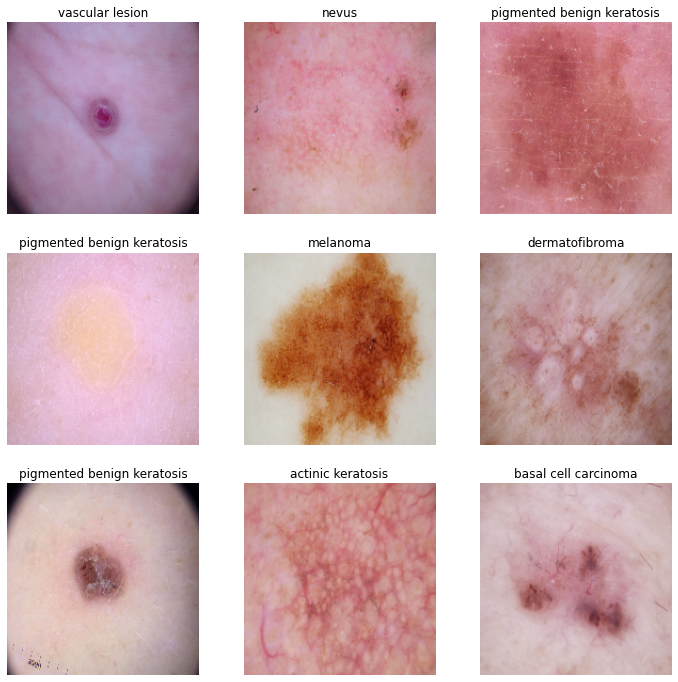

In [9]:
## Visualizing the dataset

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for images,labels in train_ds.take(1):
    for i in range(9):
        sub = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
## Creating Model M1

input_shape = (180,180,3)

model = Sequential()
## Rescaling the model
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))

model.add(Conv2D(32, (3, 3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function

## Here we choose adam optimiser and sparse_categorical_crossentropy as loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 activation (Activation)     (None, 178, 178, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 176, 176, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                        

### Train the model

In [14]:
## Setting the epoch and training the model

epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 16s 100ms/step - loss: 2.0651 - accuracy: 0.2377 - val_loss: 1.9712 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 3s 61ms/step - loss: 1.8678 - accuracy: 0.3103 - val_loss: 1.6656 - val_accuracy: 0.4362
Epoch 3/20
56/56 [==============================] - 3s 61ms/step - loss: 1.6841 - accuracy: 0.4040 - val_loss: 1.5087 - val_accuracy: 0.4631
Epoch 4/20
56/56 [==============================] - 3s 61ms/step - loss: 1.5581 - accuracy: 0.4498 - val_loss: 1.5203 - val_accuracy: 0.4564
Epoch 5/20
56/56 [==============================] - 3s 61ms/step - loss: 1.5722 - accuracy: 0.4392 - val_loss: 1.7041 - val_accuracy: 0.3893
Epoch 6/20
56/56 [==============================] - 3s 61ms/step - loss: 1.4880 - accuracy: 0.4727 - val_loss: 1.4442 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 3s 61ms/step - loss: 1.3945 - accuracy: 0.5117 - val_loss: 1.3841 - val_accuracy: 0.4922
Epoch 8/20


### Visualizing training results

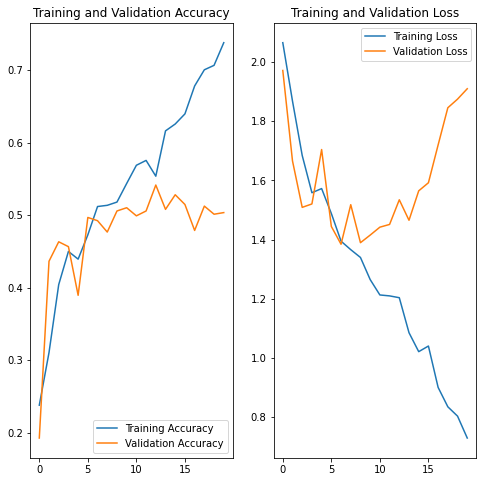

In [15]:
## Visualizing the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
#lets evaluate the model
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Training Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Training Loss: ",loss)
print("Validation Loss", loss_v)


14/14 [==============================] - 0s 21ms/step - loss: 1.9095 - accuracy: 0.5034
Training Accuracy:  0.8275669813156128
Validation Accuracy:  0.5033556818962097
Training Loss:  0.48227331042289734
Validation Loss 1.9095325469970703


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit


-  From the plot as well as the accuracy and loss values, it is evident that the model is overfitting. There are significant differences between the train and validation accuracy as well as loss.

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

# We can use ImageDataGenerator to augmnet the data with horizontal and vertical flip and display the sample result
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)



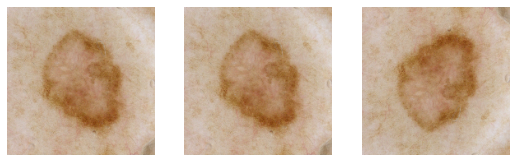

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

# Loading a sample image to show how the augmentation works
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
path = 'gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/melanoma/ISIC_0000153.jpg'
img = tf.keras.preprocessing.image.load_img(path,target_size=(180,180))
data = img_to_array(img)
samples = expand_dims(data, 0)
aug_iter = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,9))
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

In [19]:
# For implementation, we will use layers.experimental.preprocessing, which acheives similar results of ImageDataGenerator
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

### Todo:
### Create the model, compile and train the model


In [20]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Model 2
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
model.add(data_augmentation)
model.add(Conv2D(32, (3, 3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('softmax'))


### Compiling the model

In [21]:
## Compiling the model with same optimizer as well as loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 178, 178, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 activation_7 (Activation)   (None, 176, 176, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 88, 88, 32)      

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs

## Training the model for 20 epochs
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 70ms/step - loss: 2.3434 - accuracy: 0.1685 - val_loss: 2.0788 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 4s 67ms/step - loss: 2.0251 - accuracy: 0.2383 - val_loss: 2.1402 - val_accuracy: 0.2125
Epoch 3/20
56/56 [==============================] - 4s 67ms/step - loss: 1.9732 - accuracy: 0.2935 - val_loss: 1.8901 - val_accuracy: 0.3781
Epoch 4/20
56/56 [==============================] - 4s 67ms/step - loss: 1.8099 - accuracy: 0.3504 - val_loss: 1.6447 - val_accuracy: 0.4340
Epoch 5/20
56/56 [==============================] - 4s 67ms/step - loss: 1.6866 - accuracy: 0.4001 - val_loss: 1.6332 - val_accuracy: 0.4452
Epoch 6/20
56/56 [==============================] - 4s 67ms/step - loss: 1.6252 - accuracy: 0.4235 - val_loss: 1.5623 - val_accuracy: 0.4743
Epoch 7/20
56/56 [==============================] - 4s 67ms/step - loss: 1.5880 - accuracy: 0.4353 - val_loss: 1.5260 - val_accuracy: 0.4922
Epoch 8/20
56

### Visualizing the results

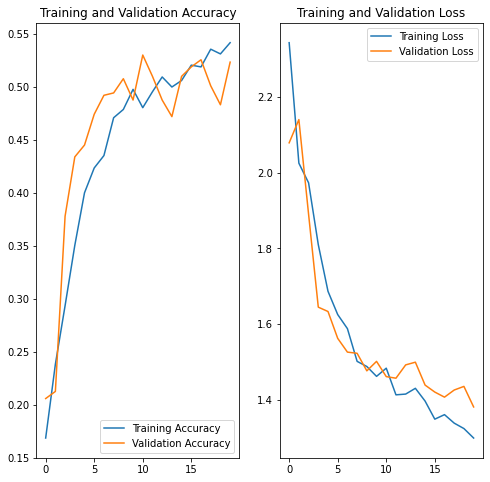

In [23]:
## Visualizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
#lets evaluate the model
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Training Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Training Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 0s 20ms/step - loss: 1.3811 - accuracy: 0.5235
Training Accuracy:  0.5591517686843872
Validation Accuracy:  0.5234899520874023
Training Loss:  1.2785568237304688
Validation Loss 1.381081223487854


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

-  After augmenting the data and using some dropouts, there is a huge reduction in overfitting of the model compared to the previous iteration. But the accuracy of the model has also come down. 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<Figure size 720x720 with 0 Axes>

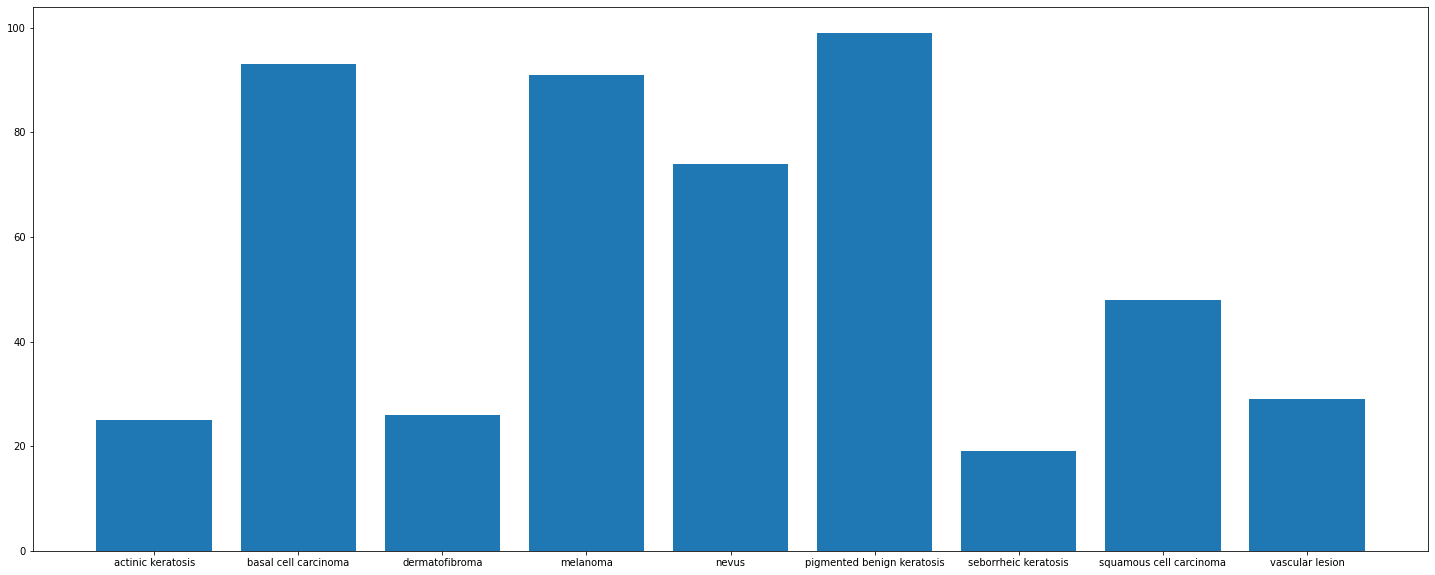

In [25]:
## Visualising the distribution of samples

data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
    for i in range(9):
      data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i]) 

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

In [26]:
## Statistics of distribution of classes
data

{'actinic keratosis': 25,
 'basal cell carcinoma': 93,
 'dermatofibroma': 26,
 'melanoma': 91,
 'nevus': 74,
 'pigmented benign keratosis': 99,
 'seborrheic keratosis': 19,
 'squamous cell carcinoma': 48,
 'vascular lesion': 29}

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
-    "seborrheic keratosis" has the least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
-    ""pigmented benign keratosis" and melanoma"  dominates the data in terms proportionate number of samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [27]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [28]:
## Setting the path for Augmentor
path_to_training_dataset='gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FADCA953590>: 100%|██████████| 500/500 [00:09<00:00, 53.47 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FADCAEC1AD0>: 100%|██████████| 500/500 [00:10<00:00, 47.28 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FADCA953A10>: 100%|██████████| 500/500 [00:11<00:00, 44.19 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FADCA8DE210>: 100%|██████████| 500/500 [00:49<00:00, 10.13 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FADCA9A5190>: 100%|██████████| 500/500 [00:38<00:00, 13.03 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FADCAEC1B90>: 100%|██████████| 500/500 [00:09<00:00, 54.02 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FADCA953050>: 100%|██████████| 500/500 [00:20<00:00, 24.60 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FADCA9D6F50>: 100%|██████████| 500/500 [00:08<00:00, 55.57 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FADCA8CC310>: 100%|██████████| 500/500 [00:08<00:00, 55.85 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [29]:
## Total image count after augmentation
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [30]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/vascular lesion/output/vascular lesion_original_ISIC_0030275.jpg_e93e6cff-90af-47a7-9c5b-618cbce2e2f7.jpg',
 'gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/vascular lesion/output/vascular lesion_original_ISIC_0031270.jpg_a4a8f1ab-d07f-4178-8f51-6aa2cd763119.jpg',
 'gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/vascular lesion/output/vascular lesion_original_ISIC_0032692.jpg_834a3769-0637-42ac-aa46-60af7caf790c.jpg',
 'gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/vascular lesion/output/vascular lesion_original_ISIC_0026693.jpg_3915c638-a7fe-442c-87cb-d0f0b3353305.jpg',
 'gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/vascular lesion/output/vascular lesion_original_ISIC_0029608.jpg_7edc94e2-f983-401e-bb80-e09ce2e8e2ed.jpg',
 'gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/vascular lesion/output/vascular lesion_original_ISIC_0025628.jpg_1286fa83-8064-45d7-8986-377fcd7096d0.jpg',
 'gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train/vascular lesion/output/

In [31]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [32]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [33]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [34]:
## We can see 500 images added to each class
new_df['Label'].value_counts()

vascular lesion               500
melanoma                      500
squamous cell carcinoma       500
basal cell carcinoma          500
actinic keratosis             500
nevus                         500
seborrheic keratosis          500
pigmented benign keratosis    500
dermatofibroma                500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [35]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [36]:
## Creating train and validation dataset to include augmented data
data_dir_train='gdrive/My Drive/MLAI/CNN/Melanoma_Data/Train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [60]:
## Model 3
input_shape = (180,180,3)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))



model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('softmax'))

model.summary()




Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 activation_54 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 conv2d_39 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 activation_55 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_24 (Bat  (None, 90, 90, 32)       128       
 chNormalization)                                     

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [61]:
## Keeping the same optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [62]:
## Training the model
epochs = 30

batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 22s 120ms/step - loss: 1.8850 - accuracy: 0.3876 - val_loss: 1.8476 - val_accuracy: 0.3333
Epoch 2/30
169/169 [==============================] - 20s 116ms/step - loss: 1.4819 - accuracy: 0.4711 - val_loss: 2.1975 - val_accuracy: 0.2910
Epoch 3/30
169/169 [==============================] - 21s 119ms/step - loss: 1.3036 - accuracy: 0.5284 - val_loss: 1.3749 - val_accuracy: 0.5204
Epoch 4/30
169/169 [==============================] - 20s 117ms/step - loss: 1.1555 - accuracy: 0.5779 - val_loss: 1.5356 - val_accuracy: 0.4499
Epoch 5/30
169/169 [==============================] - 21s 118ms/step - loss: 1.0360 - accuracy: 0.6231 - val_loss: 1.1823 - val_accuracy: 0.5590
Epoch 6/30
169/169 [==============================] - 20s 117ms/step - loss: 0.9131 - accuracy: 0.6725 - val_loss: 1.6998 - val_accuracy: 0.4031
Epoch 7/30
169/169 [==============================] - 21s 119ms/step - loss: 0.8099 - accuracy: 0.6999 - val_loss: 1.7966 - val_ac

#### **Todo:**  Visualize the model results

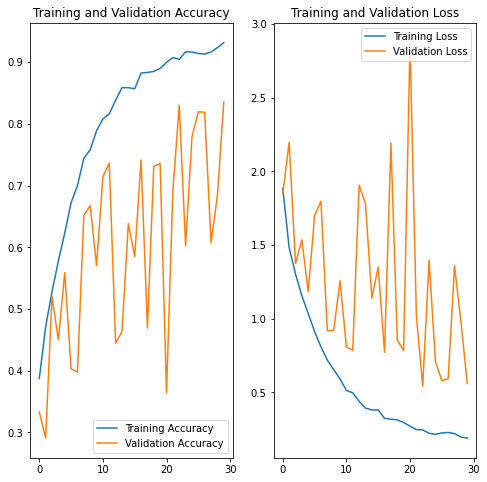

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [64]:
#lets evaluate the model
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Training Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Training Loss: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 4s 77ms/step - loss: 0.5613 - accuracy: 0.8352
Training Accuracy:  0.9603115916252136
Validation Accuracy:  0.8351892828941345
Training Loss:  0.10562672466039658
Validation Loss 0.5612693428993225


#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- After class rebalance , both our Train and Validation accuracy have significantly improved. Though there is a slight overfit, the loss has been greatly reduced. 